In [15]:
from imblearn.over_sampling import SMOTE

import itertools

import pathlib

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pickle

from sklearn import linear_model, datasets, svm, datasets
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, accuracy_score, classification_report, recall_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import urllib.request



In [4]:
building_merge5 = pd.read_pickle("building_merge5.pkl")
building_merge5.shape

(21905, 162)

In [5]:
X_15 = pd.read_pickle("X_15.pkl")
X_15.shape

(21905, 28)

In [6]:
X_16 = pd.read_pickle("X_16.pkl")
X_16.shape

(21905, 28)

In [7]:
building_merge5.columns.values

array(['index', 'Address', 'Borough', 'UnitsRes', 'CT2010', 'OwnerType',
       'OwnerName', 'LotFront', 'NumFloors', 'BldgArea', 'YearBuilt',
       'ResArea', 'BldgClass', 'XCoord', 'YCoord', 'index', 'lon_x',
       'lat_x', 'lat_y', 'lon_y', 'geometry_x', 'index_right_x',
       'TRACTCE', 'ALAND', 'GEOID', 'lat', 'lon', 'geometry_y',
       'index_right_y', 'NTAName', 'Id', 'Estimate; Total_14',
       'Estimate; Total_15', 'Estimate; Total_16',
       'Estimate; Total: - Owner occupied_14',
       'Estimate; Total: - Renter occupied_14',
       'Estimate; Total: - Owner occupied_15',
       'Estimate; Total: - Renter occupied_15', 'Estimate; Total:_16',
       'Estimate; Total: - Owner occupied_16',
       'Estimate; Total: - Renter occupied_16', 'counts_ele_15',
       'counts_ele_16', 'counts_ele_17', 'counts_ele_14', 'counts_ele_13',
       'counts_heat_15', 'counts_heat_16', 'counts_heat_17',
       'counts_heat_14', 'counts_heat_13', 'counts_noise_15',
       'counts_noise_1

In [8]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ("0", "1"), rotation=45)
    plt.yticks(tick_marks, ("0", "1"))


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def modelfit(y1, y2, C): 
    """y1 is 
    y2 is
    c is 
    exception is returned?
    """
    y=building_merge5.loc[:,[y1]]
    X_train, X_test, y_train, y_test = train_test_split(X_15, y.values.ravel(), test_size=0.3, random_state=0)
    sm = SMOTE(random_state=12)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

    

    #try logistic models
    logreg_l2_0 = LogisticRegression(penalty='l2', solver='liblinear', C=C)
    logreg_l2_0.fit(X_train_res, y_train_res)
    logreg_l2_0_pred = logreg_l2_0.predict(X_test)
    print("logistic L2")
    print(classification_report(y_test, logreg_l2_0_pred))
    print("logistic model vs actual:", f1_score(logreg_l2_0_pred, y_test) )
    logreg_l2_100_pred_17 = logreg_l2_0.predict(X_16)
    y_17=building_merge5.loc[:,[y2]]
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_17, logreg_l2_100_pred_17)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,
    title='Confusion matrix, with normalization')
    #predicted prob
    y_predict_probabilities = logreg_l2_0.predict_proba(X_16)[:,1]
    fpr, tpr, _ = roc_curve(y_17, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    

In [10]:
def modelfit_not_sm(y1, y2, C):
    y=building_merge5.loc[:,[y1]]
    X_train, X_test, y_train, y_test = train_test_split(X_15, y.values.ravel(), test_size=0.3, random_state=0)

    #try logistic models

    logreg_l2_0_non_smote = LogisticRegression(penalty='l2', solver='liblinear', C=C)
    logreg_l2_0_non_smote.fit(X_train, y_train)
    logreg_l2_0_pred_non_smote = logreg_l2_0_non_smote.predict(X_test)
    print("logistic L2 SMOTE")
    print(classification_report(y_test, logreg_l2_0_pred_non_smote))
    print("logistic model vs actual:", f1_score(logreg_l2_0_pred_non_smote, y_test) )
    logreg_l2_100_pred_17 = logreg_l2_0_non_smote.predict(X_16)
    y_17=building_merge5.loc[:,[y2]]
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_17, logreg_l2_100_pred_17)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,
    title='Confusion matrix, with normalization')
    #predicted prob
    y_predict_probabilities = logreg_l2_0_non_smote.predict_proba(X_16)[:,1]
    fpr, tpr, _ = roc_curve(y_17, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



In [11]:
def modelfit_rf(y1, y2, D, E):   
    y=building_merge5.loc[:,[y1]]
    X_train, X_test, y_train, y_test = train_test_split(X_15, y.values.ravel(), test_size=0.3, random_state=0)
    sm = SMOTE(random_state=12)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

    #fit RF model
    clf = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=D, n_estimators=E)
    clf.fit(X_train_res, y_train_res)
    clf_pred = clf.predict(X_test)
    print("RF Depth 3 N 10")
    print(classification_report(y_test, clf_pred))
    clf_pred_17 = clf.predict(X_16)
    y_17=building_merge5.loc[:,[y2]]
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_17, clf_pred_17)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,
    title='Confusion matrix, with normalization')
    #predicted prob
    y_predict_probabilities = clf.predict_proba(X_16)[:,1]
    fpr, tpr, _ = roc_curve(y_17, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


RF Depth 3 N 10
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      5986
          1       0.39      0.55      0.46       586

avg / total       0.90      0.88      0.89      6572

Normalized confusion matrix
[[0.92 0.08]
 [0.43 0.57]]


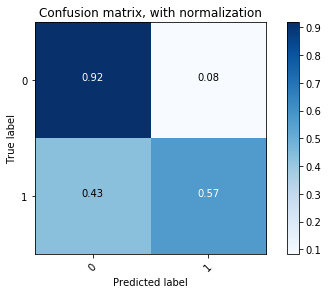

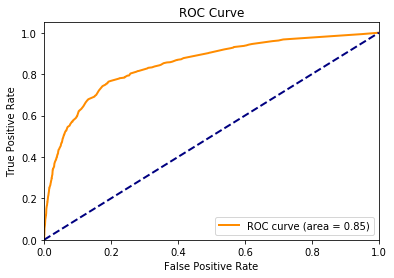

In [12]:
modelfit_rf('building_w_noise_16_2_1', 'building_w_noise_17_2_1', 5, 3)

logistic L2
             precision    recall  f1-score   support

          0       0.97      0.88      0.92      5986
          1       0.35      0.68      0.46       586

avg / total       0.91      0.86      0.88      6572

logistic model vs actual: 0.46288720046756276
Normalized confusion matrix
[[0.87 0.13]
 [0.32 0.68]]


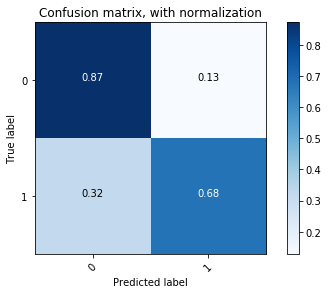

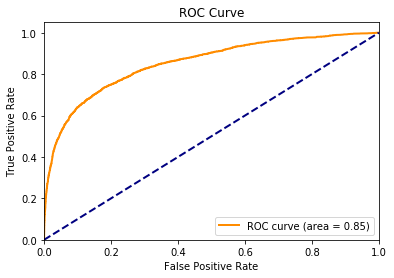

In [13]:
modelfit('building_w_noise_16_2_1','building_w_noise_17_2_1',  .1)

logistic L2 SMOTE
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      5986
          1       0.73      0.20      0.32       586

avg / total       0.91      0.92      0.90      6572

logistic model vs actual: 0.32
Normalized confusion matrix
[[0.99 0.01]
 [0.78 0.22]]


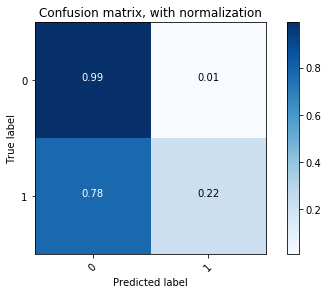

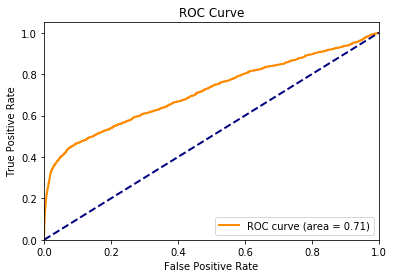

In [14]:
modelfit_not_sm('building_w_noise_16_2_1','building_w_noise_17_2_1',  .1)